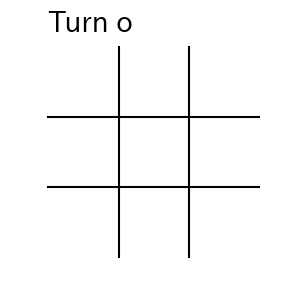

ゲームを終了します


In [1]:
%matplotlib widget
from marubatsu import Marubatsu

mb = Marubatsu()
mb.play(ai=[None, None], gui=True)

In [2]:
import matplotlib.pyplot as plt

def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False):
        # seed が None でない場合は、seed を乱数の種として設定する
        if seed is not None:
            random.seed(seed)
        
        # 〇×ゲームを再起動する
        self.restart()
        # ゲームの決着がついていない間繰り返す
        while self.status == Marubatsu.PLAYING:
            # ゲーム盤の表示
            if verbose:
                if gui:
                    self.draw_board()
                    return
                else:
                    print(self)
                    
            # 現在の手番を表す ai のインデックスを計算する
            index = 0 if self.turn == Marubatsu.CIRCLE else 1
            # ai が着手を行うかどうかを判定する
            if ai[index] is not None:
                x, y = ai[index](self, **params[index])
            else:
                # キーボードからの座標の入力
                coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
                # "exit" が入力されていればメッセージを表示して関数を終了する
                if coord == "exit":
                    print("ゲームを終了します")
                    return       
                # x 座標と y 座標を要素として持つ list を計算する
                xylist = coord.split(",")
                # xylist の要素の数が 2 ではない場合
                if len(xylist) != 2:
                    # エラーメッセージを表示する
                    print("x, y の形式ではありません")
                    # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                    continue
                x, y = xylist
            # (x, y) に着手を行う
            try:
                self.move(int(x), int(y))
            except:
                print("整数の座標を入力して下さい")

        # 決着がついたので、ゲーム盤を表示する
        if verbose:
            if gui:
                self.draw_board()
            else:
                print(self)
                
        return self.status
    
Marubatsu.play = play

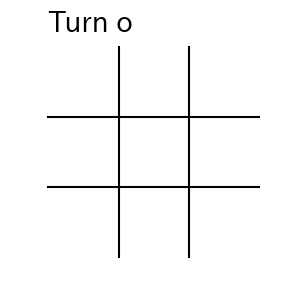

In [3]:
mb.play(ai=[None, None], gui=True)

In [4]:
def on_mouse_down(event):
    print(event.xdata, event.ydata)

In [5]:
def draw_board(self, size=3):   
    fig, ax = plt.subplots(figsize=[size, size])
    fig.canvas.mpl_connect("button_press_event", on_mouse_down)
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.resizable = False
        
    # y 軸を反転させる
    ax.invert_yaxis()

    # 枠と目盛りを表示しないようにする
    ax.axis("off")

    # 上部のメッセージを描画する
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 決着がついていれば勝者を表示する
    else:
        text = "winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)

    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color)

    # ゲーム盤を描画する
    plt.show()          

Marubatsu.draw_board = draw_board

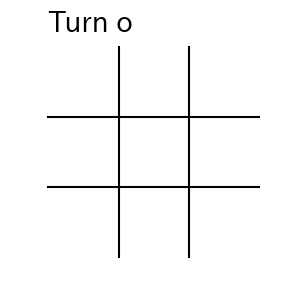

0.41064516129032247 0.7214285714285711
1.503548387096774 1.8642857142857139
2.3693548387096772 2.307142857142857


In [6]:
mb.play(ai=[None, None], gui=True)

In [7]:
import math

print(math.floor(1))
print(math.floor(0.5))
print(math.floor(0))
print(math.floor(-0.5)) # 0 ではなく、-1 が返される
print(math.floor(-1))

1
0
0
-1
-1


In [8]:
print(math.ceil(1))
print(math.ceil(0.5))
print(math.ceil(0))
print(math.ceil(-0.5)) # -1 ではなく、0 が返される
print(math.ceil(-1))

1
1
0
0
-1


In [9]:
print(round(2))
print(round(1.5))
print(round(1))
print(round(0.5))
print(round(0))
print(round(-0.5))
print(round(-1))
print(round(-1.5))
print(round(-2))

2
2
1
0
0
0
-1
-2
-2


In [10]:
print(math.trunc(1))
print(math.trunc(0.5))
print(math.trunc(0))
print(math.trunc(-0.5))
print(math.trunc(-1))

1
0
0
0
-1


In [11]:
print(math.trunc(1))
print(math.trunc(0.5))
print(math.trunc(0))
print(math.trunc(-0.5))
print(math.trunc(-1))

1
0
0
0
-1


In [12]:
print(int("1"))

1


In [13]:
print(math.trunc("1"))

TypeError: type str doesn't define __trunc__ method

In [14]:
def on_mouse_down(event):
    print(int(event.xdata), int(event.ydata))

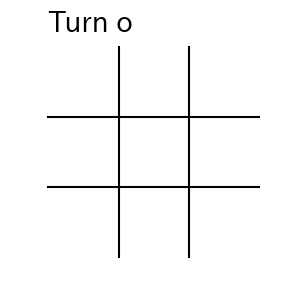

1 1
2 1
0 1


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [15]:
mb.play(ai=[None, None], gui=True)

In [16]:
def draw_board(self, size=3):   
    fig, ax = plt.subplots(figsize=[size, size], facecolor="lightblue")
    fig.canvas.mpl_connect("button_press_event", on_mouse_down)
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.resizable = False
        
    # y 軸を反転させる
    ax.invert_yaxis()

    # 枠と目盛りを表示しないようにする
    #ax.axis("off")

    # 上部のメッセージを描画する
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 決着がついていれば勝者を表示する
    else:
        text = "winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)

    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color)

    # ゲーム盤を描画する
    plt.show()          

Marubatsu.draw_board = draw_board

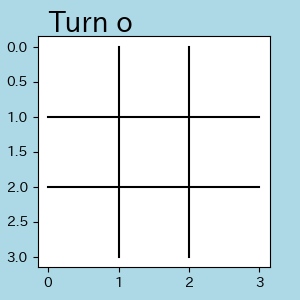

In [17]:
mb.play(ai=[None, None], gui=True)

In [18]:
def on_mouse_down(event):
    # Axes の上でマウスを押していた場合のみ処理を行う
    if event.inaxes:
        print(int(event.xdata), int(event.ydata))

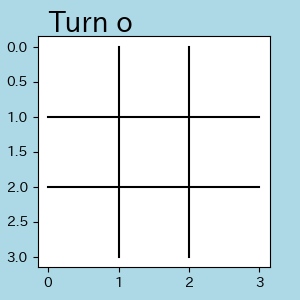

In [19]:
mb.play(ai=[None, None], gui=True)

In [20]:
def on_mouse_down(event):
    # Axes の上でマウスを押していた場合のみ処理を行う
    if event.inaxes:
        print(math.floor(event.xdata), math.floor(event.ydata))

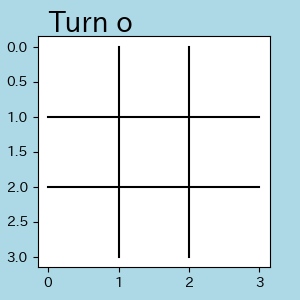

-1 0
1 -1
-1 -1


In [21]:
mb.play(ai=[None, None], gui=True)

In [24]:
def draw_board(self, size=3):   
    fig, ax = plt.subplots(figsize=[size, size])
    fig.canvas.mpl_connect("button_press_event", on_mouse_down)
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    fig.canvas.resizable = False
        
    # y 軸を反転させる
    ax.invert_yaxis()

    # 枠と目盛りを表示しないようにする
    ax.axis("off")

    # 上部のメッセージを描画する
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 決着がついていれば勝者を表示する
    else:
        text = "winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)

    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color)

    # ゲーム盤を描画する
    plt.show()          

Marubatsu.draw_board = draw_board

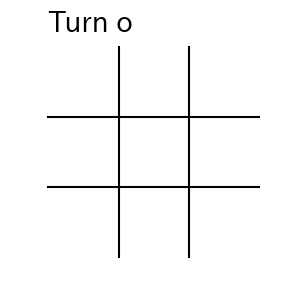

In [25]:
mb.play(ai=[None, None], gui=True)